# Gojek Bootcamp Kaggle Challenge 2019
## Fake GPS Detection
#### By Claudius Devlin Halimi

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567545 entries, 0 to 567544
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            567545 non-null  object 
 1   service_type        567545 non-null  object 
 2   driver_status       567545 non-null  object 
 3   date                567545 non-null  object 
 4   hour                567545 non-null  int64  
 5   seconds             567545 non-null  int64  
 6   latitude            567545 non-null  float64
 7   longitude           567545 non-null  float64
 8   altitude_in_meters  413142 non-null  float64
 9   accuracy_in_meters  567545 non-null  float64
 10  label               567545 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 47.6+ MB


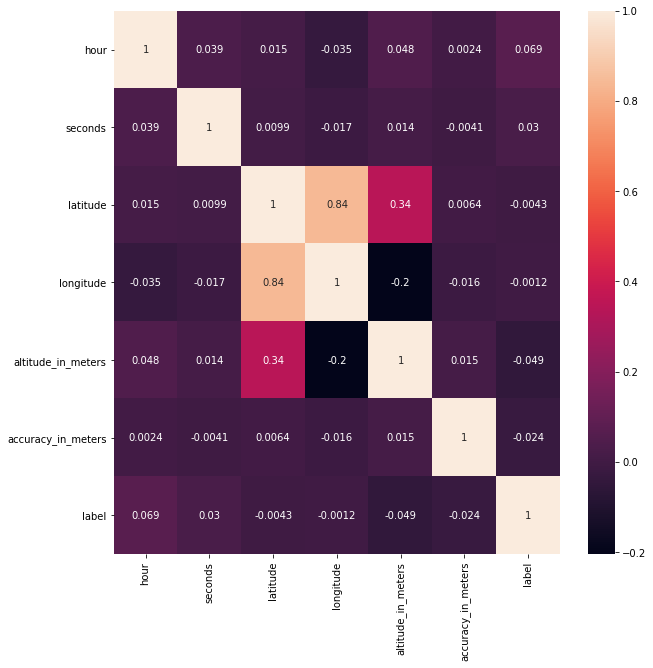

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True)

There are some missing data on altitude_in_meters. So we are going to fill it with another feature. As we can see, the heatmap correlation shows that altitude is quite related with latitude and longitude. Because of that, we will use two of those feature to fill mising data from altitude with decision tree regressor.

# Filling the missing data using decision tree regressor

In [5]:
# not null altitude
df_train_nonull=df_train[~df_train['altitude_in_meters'].isna()]
df_train_nonull

,order_id,service_type,driver_status,date,hour,seconds,latitude,longitude,altitude_in_meters,accuracy_in_meters,label
1,RB193,GO_RIDE,AVAILABLE,2018-02-05,6,1548890680,-6.923039,107.631250,712.000000,9.577,0
2,RB193,GO_RIDE,AVAILABLE,2018-02-05,6,1548890690,-6.923039,107.631250,712.000000,9.577,0
3,RB193,GO_RIDE,AVAILABLE,2018-02-05,6,1548890700,-6.923048,107.631230,713.000000,8.139,0
4,RB193,GO_RIDE,AVAILABLE,2018-02-05,6,1548890710,-6.922968,107.631253,713.000000,7.029,0
5,RB193,GO_RIDE,AVAILABLE,2018-02-05,6,1548890720,-6.922968,107.631253,713.000000,7.029,0
...,...,...,...,...,...,...,...,...,...,...,...
567540,RB261,GO_RIDE,OTW_DROPOFF,2018-03-22,13,1552803198,-6.889018,107.595516,798.799988,21.381,1
567541,RB261,GO_RIDE,OTW_DROPOFF,2018-03-22,13,1552803208,-6.889020,107.595516,798.799988,19.621,1
567542,RB261,GO_RIDE,OTW_DROPOFF,2018-03-22,13,1552803218,-6.889017,107.595526,798.799988,18.012,1
567543,RB261,GO_RIDE,OTW_DROPOFF,2018-03-22,13,1552803228,-6.889017,107.595526,798.799988,18.012,1


### Train Data

In [6]:
fitur=df_train[~df_train['altitude_in_meters'].isna()][['latitude','longitude']]
hasil=df_train[~df_train['altitude_in_meters'].isna()]['altitude_in_meters']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(fitur, hasil, test_size=0.3)

In [8]:
from sklearn.tree import DecisionTreeRegressor
hutan=DecisionTreeRegressor()
hutan.fit(x_train, y_train)
hutan_predict=hutan.predict(x_test)

In [9]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, hutan_predict))
print('MSE:', metrics.mean_squared_error(y_test, hutan_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, hutan_predict)))

MAE: 11.21620306091887
MSE: 2990.413723332435
RMSE: 54.684675397522795


In [10]:
hasil.describe()

count    413142.000000
mean        744.885056
std         105.357303
min       -1075.000000
25%         708.300000
50%         748.400000
75%         790.481659
max        4674.877000
Name: altitude_in_meters, dtype: float64

We can see the MAE is quite small compared to the altitude data. and the RMSE is small also. So we can use this model to fill the missing altitude data.

In [11]:
fill=DecisionTreeRegressor()
fill.fit(fitur, hasil)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [12]:
from tqdm import tqdm 

kosong=df_train[df_train['altitude_in_meters'].isna()].index
for i in tqdm(kosong):
    df_train.loc[i,'altitude_in_meters']=fill.predict(np.array(df_train.loc[i,['latitude','longitude']]).reshape(1,-1)).item()

100%|█████████████████████████████████████████████████████████████████████████| 154403/154403 [17:40<00:00, 145.60it/s]


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567545 entries, 0 to 567544
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            567545 non-null  object 
 1   service_type        567545 non-null  object 
 2   driver_status       567545 non-null  object 
 3   date                567545 non-null  object 
 4   hour                567545 non-null  int64  
 5   seconds             567545 non-null  int64  
 6   latitude            567545 non-null  float64
 7   longitude           567545 non-null  float64
 8   altitude_in_meters  567545 non-null  float64
 9   accuracy_in_meters  567545 non-null  float64
 10  label               567545 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 47.6+ MB


### Test Data

In [14]:
test_feature=df_test[~df_test['altitude_in_meters'].isna()][['latitude','longitude']]
test_hasil=df_test[~df_test['altitude_in_meters'].isna()]['altitude_in_meters']

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(test_feature, test_hasil, test_size=0.3)

In [16]:
isi=DecisionTreeRegressor()
isi.fit(X_train, Y_train)
fill_test=isi.predict(X_test)

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, hutan_predict))
print('MSE:', metrics.mean_squared_error(y_test, hutan_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, hutan_predict)))

MAE: 11.21620306091887
MSE: 2990.413723332435
RMSE: 54.684675397522795


In [18]:
test_hasil.describe()

count    60131.000000
mean       741.812725
std        104.837232
min       -181.000000
25%        708.600000
50%        745.000000
75%        788.300000
max       1078.000000
Name: altitude_in_meters, dtype: float64

We can see evaluation model for test data is as good as the train data. So we are gonna use the same model but using the test data

In [19]:
fill.fit(test_feature, test_hasil)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [20]:
#Test data
from tqdm import tqdm

empty=df_test[df_test['altitude_in_meters'].isna()].index
for i in tqdm(empty):
    df_test.loc[i,'altitude_in_meters']=fill.predict(np.array(df_test.loc[i,['latitude','longitude']]).reshape(1,-1)).item()

100%|███████████████████████████████████████████████████████████████████████████| 21203/21203 [00:25<00:00, 818.26it/s]


# Predicting the label for each user.

Because we have to predict the label for each order_id, so we're going to group the data y the order id and then we aggregate the grouping data with sum, min, max, mean, median, and std. The feature that we are going to use to predict the label is seconds, latitude, longitude, altitude, and accuracy. The prediction model that we are going to use is random forest classifier

In [21]:
train=df_train[['order_id','seconds','latitude','longitude','altitude_in_meters','accuracy_in_meters','label']].groupby('order_id').agg(['sum','min','max','mean','median','std'])
test=df_test[['order_id','seconds','latitude','longitude','altitude_in_meters','accuracy_in_meters']].groupby('order_id').agg(['sum','min','max','mean','median','std'])

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, F0 to RB999
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (seconds, sum)                3500 non-null   int64  
 1   (seconds, min)                3500 non-null   int64  
 2   (seconds, max)                3500 non-null   int64  
 3   (seconds, mean)               3500 non-null   float64
 4   (seconds, median)             3500 non-null   float64
 5   (seconds, std)                3498 non-null   float64
 6   (latitude, sum)               3500 non-null   float64
 7   (latitude, min)               3500 non-null   float64
 8   (latitude, max)               3500 non-null   float64
 9   (latitude, mean)              3500 non-null   float64
 10  (latitude, median)            3500 non-null   float64
 11  (latitude, std)               3498 non-null   float64
 12  (longitude, sum)              3500 non-null   float64
 13  (longi

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, F10 to RB993
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (seconds, sum)                500 non-null    int64  
 1   (seconds, min)                500 non-null    int64  
 2   (seconds, max)                500 non-null    int64  
 3   (seconds, mean)               500 non-null    float64
 4   (seconds, median)             500 non-null    float64
 5   (seconds, std)                500 non-null    float64
 6   (latitude, sum)               500 non-null    float64
 7   (latitude, min)               500 non-null    float64
 8   (latitude, max)               500 non-null    float64
 9   (latitude, mean)              500 non-null    float64
 10  (latitude, median)            500 non-null    float64
 11  (latitude, std)               500 non-null    float64
 12  (longitude, sum)              500 non-null    float64
 13  (longi

There are some order_id that only have 1 order, that means the std is 0. But on when we grouped and aggregated the table, the value becomes Nan. So, we are going to fill the nan with 0.

In [24]:
data_train, data_test, target_train, target_test=train_test_split(train.drop(columns='label'), train['label']['min'], test_size=0.3)
train.fillna(0, inplace=True)

In [25]:
from sklearn.ensemble import RandomForestClassifier

data_train.fillna(0, inplace=True)
data_test.fillna(0, inplace=True)

model=RandomForestClassifier()
model.fit(data_train, target_train)
label=model.predict(data_test)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(target_test, label))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       316
           1       0.90      0.88      0.89       734

    accuracy                           0.85      1050
   macro avg       0.82      0.83      0.83      1050
weighted avg       0.85      0.85      0.85      1050



Alright, this is good. The accuracy score is 87% and the precision and recall is not bad. We can see here that the model can recognize a fake gps more. That means some order that is not fake can be recognized as a fake and that is not cool. But the model also can predict not fake order quite well, the precision and recall is not as good as the fake one. But I can bare with that.

# Alright let's predict the test data
Because the label can be either 1 or 0 so I use the min aggregate label, since each order can only have one label. It doesn't matter if we use any aggregate feature. As long as we don't use the std because it's always 0.

In [27]:
model.fit(train.drop(columns='label'), train['label']['min'])
predict=model.predict(test)
final=pd.DataFrame(zip(test.index,predict), columns=['order_id','label'])

In [28]:
final

,order_id,label
0,F10,0
1,F1008,0
2,F1011,1
3,F1022,1
4,F103,1
...,...,...
495,RB926,0
496,RB928,0
497,RB955,0
498,RB976,1


In [29]:
final.to_csv('final_submission.csv')

And here we go, I really want to compared my answer to the real answer. But I can't find any resource that have the real answer. But I do compared it to the answers on the kernels and I'm happy with my answer. Thank you hope this will help you guys.

# Thank You